# A1: Data Curation Assignment
### Zihui (Joyce) Zhang

This is the jupyter notebook that contains all the data acquistion, processing and analysis steps for A1 Data Curation Assignment. The goal of this assignment is to analyze the traffic on English Wikipedia from January 1 2008 through August 30 2021, and construct related datasets.

## Step 1: Data acquisition

In this step, I collected data from two different API endpoints, the Legacy Pagecounts API and the Pageviews API.
- The Legacy Pagecounts API provides access to desktop and mobile traffic data from December 2007 through July 2016.
- The Pageviews API provides access to desktop, mobile web, and mobile app traffic data from July 2015 through last month.

The collected data are stored into five JSON files
- pagecounts_desktop-site_200712-201607.json
- pagecounts_mobile-site_200712-201607.json
- pageviews_desktop_201507-202109.json
- pageviews_mobile-web_201507-202109.json
- pageviews_mobile-app_201507-202109.json

In [1]:
# Read in necessary packages
import json
import requests
import pandas as pd
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [2]:
# Define API endpoints
endpoint_legacy = 'https://wikimedia.org/api/rest_v1/metrics/legacy/pagecounts/aggregate/{project}/{access-site}/{granularity}/{start}/{end}'
endpoint_pageviews = 'https://wikimedia.org/api/rest_v1/metrics/pageviews/aggregate/{project}/{access}/{agent}/{granularity}/{start}/{end}'

# Set necessary parameter for data requesting
pagecounts_desktop = {"project" : "en.wikipedia.org",
                      "access-site" : "desktop-site",
                      "granularity" : "monthly",
                      "start" : "2007120100",
                      "end" : "2016080100"
                     }
pagecounts_mobile = {"project" : "en.wikipedia.org",
                     "access-site" : "mobile-site",
                     "granularity" : "monthly",
                     "start" : "2007120100",
                     "end" : "2016080100"
                    }

pageviews_desktop = {"project" : "en.wikipedia.org",
                     "access" : "desktop",
                     "agent" : "user",
                     "granularity" : "monthly",
                     "start" : "2015070100",
                     "end" : '2021100100'
                    }

pageviews_mobile_web = {"project" : "en.wikipedia.org",
                        "access" : "mobile-web",
                        "agent" : "user",
                        "granularity" : "monthly",
                        "start" : "2015070100",
                        "end" : '2021100100'
                       }

pageviews_mobile_app = {"project" : "en.wikipedia.org",
                        "access" : "mobile-app",
                        "agent" : "user",
                        "granularity" : "monthly",
                        "start" : "2015070100",
                        "end" : '2021100100'
                       }

headers = {
    'User-Agent': 'https://github.com/zihuiz',
    'From': 'zihuiz@uw.edu'
}

In [3]:
# Create function for API call
def api_call(endpoint,parameters):
    call = requests.get(endpoint.format(**parameters), headers=headers)
    response = call.json()
    
    return response

In [4]:
# Collect data from APIs and save data to JSON files
pagecounts_desktop_json = api_call(endpoint_legacy, pagecounts_desktop)
with open('pagecounts_desktop-site_200712-201607.json', 'w') as outfile:
    json.dump(pagecounts_desktop_json['items'], outfile)

pagecounts_mobile_json = api_call(endpoint_legacy, pagecounts_mobile)
with open('pagecounts_mobile-site_200712-201607.json', 'w') as outfile:
    json.dump(pagecounts_mobile_json['items'], outfile)

pageviews_desktop_json = api_call(endpoint_pageviews, pageviews_desktop)
with open('pageviews_desktop_201507-202109.json', 'w') as outfile:
    json.dump(pageviews_desktop_json['items'], outfile)
    
pageviews_mobile_web_json = api_call(endpoint_pageviews, pageviews_mobile_web)
with open('pageviews_mobile-web_201507-202109.json', 'w') as outfile:
    json.dump(pageviews_mobile_web_json['items'], outfile)

pageviews_mobile_app_json = api_call(endpoint_pageviews, pageviews_mobile_app)
with open('pageviews_mobile-app_201507-202109.json', 'w') as outfile:
    json.dump(pageviews_mobile_app_json['items'], outfile)

## Step 2: Data processing

In this section, I performed the following data processing steps:
- For data collected from the Pageviews API, I combined the views for mobile-web and mobile-app and created a table for overall mobile views.
- For all data, I extracted the four-digit year (YYYY) and two-digit month (MM) from the original timestamp, and discarded the day and hour (DDHH). 
- For all data, I extracted the year, month, and views/counts, and merged then into a single dataframes and saved it to a CSV file. The dataframe has the following columns:
<ol>
<li> year </li>
<li> month </li>
<li> pagecount_all_views </li>
<li> pagecount_desktop_views </li>
<li> pagecount_mobile_views </li>
<li> pageview_all_views </li>
<li> pageview_desktop_views </li>
<li> pageview_mobile_views </li>
</ol>
The pagecount_all_views and pageview_all_views are the combined views from desktop and mobile. For months and column with no available data, the value is 0.

In [5]:
# Read in JSON files saved in Step 1
pagecounts_desktop_df = pd.read_json('pagecounts_desktop-site_200712-201607.json',convert_dates=False)
pagecounts_mobile_df = pd.read_json('pagecounts_mobile-site_200712-201607.json',convert_dates=False)
pageviews_desktop_df = pd.read_json('pageviews_desktop_201507-202109.json',convert_dates=False)
pageviews_mobile_web_df = pd.read_json('pageviews_mobile-web_201507-202109.json',convert_dates=False)
pageviews_mobile_app_df = pd.read_json('pageviews_mobile-app_201507-202109.json',convert_dates=False)

In [6]:
# Function that extracts the four-digit year (YYYY) and two-digit month (MM) from the original timestamp, 
# and saves them to new columns.
def extract_year_month(df):
    df['year'] = df['timestamp'].astype(str).str[0:4]
    df['month'] = df['timestamp'].astype(str).str[4:6]
    return df

In [7]:
# Extracts the four-digit year (YYYY) and two-digit month (MM) from the original timestamp
# Select only the year, month and count/views data
# time range: 2007-12 - 2016-07
pagecounts_desktop_df = extract_year_month(pagecounts_desktop_df)[['year','month','count']]

# time range: 2014-10 - 2016-07
pagecounts_mobile_df = extract_year_month(pagecounts_mobile_df)[['year','month','count']]

# time range: 2015-07 - 2021-09
pageviews_desktop_df = extract_year_month(pageviews_desktop_df)[['year','month','views']]

# Combine the mobile web and mobile app data from Pageviews API
# time range: 2015-07 - 2021-09
pageviews_mobile_web_df = extract_year_month(pageviews_mobile_web_df)[['year','month','views']]
pageviews_mobile_app_df = extract_year_month(pageviews_mobile_app_df)[['year','month','views']]
pageviews_mobile_df = pageviews_mobile_web_df[['year','month']]
pageviews_mobile_df['views'] = pageviews_mobile_web_df['views'] + pageviews_mobile_app_df['views']

In [8]:
# Create the new dataframe that combines the data from two APIs
year = list(range(2007,2022))
year_str = [str(y) for y in year]
month = ['01','02','03','04','05','06','07','08','09','10','11','12']
overview_df = pd.DataFrame(list(product(year_str, month)), columns=['year', 'month'])
overview_df = overview_df.loc[((overview_df['year'].astype(int)>2007) | (overview_df['month'].astype(int)>11)),:]
overview_df = overview_df.loc[((overview_df['year'].astype(int)<2021) | (overview_df['month'].astype(int)<9)),:]

pagecount_all_views = []
pagecount_desktop_views = []
pagecount_mobile_views = []
pageview_all_views = []
pageview_desktop_views = []
pageview_mobile_views = []

In [9]:
for i in range(overview_df.shape[0]):
    curr_year = overview_df['year'].iloc[i]
    curr_month = overview_df['month'].iloc[i]
    curr_pagecounts_desktop = pagecounts_desktop_df.loc[(pagecounts_desktop_df['year'] == curr_year) &
                                                        (pagecounts_desktop_df['month'] == curr_month),'count']
    curr_pagecounts_mobile = pagecounts_mobile_df.loc[(pagecounts_mobile_df['year'] == curr_year) &
                                                      (pagecounts_mobile_df['month'] == curr_month),'count']
    curr_pageviews_desktop = pageviews_desktop_df.loc[(pageviews_desktop_df['year'] == curr_year) &
                                                      (pageviews_desktop_df['month'] == curr_month),'views']
    curr_pageviews_mobile = pageviews_mobile_df.loc[(pageviews_mobile_df['year'] == curr_year) &
                                                    (pageviews_mobile_df['month'] == curr_month),'views']
    
    
    curr_pagecount_desktop_views = curr_pagecounts_desktop.iloc[0] if len(curr_pagecounts_desktop) != 0 else 0
    curr_pagecount_mobile_views = curr_pagecounts_mobile.iloc[0] if len(curr_pagecounts_mobile) != 0 else 0
    pagecount_desktop_views.append(curr_pagecount_desktop_views)
    pagecount_mobile_views.append(curr_pagecount_mobile_views)
    pagecount_all_views.append(curr_pagecount_desktop_views + curr_pagecount_mobile_views)
    
    curr_pageview_desktop_views = curr_pageviews_desktop.iloc[0] if len(curr_pageviews_desktop) != 0 else 0
    curr_pageview_mobile_views = curr_pageviews_mobile.iloc[0] if len(curr_pageviews_mobile) != 0 else 0
    pageview_desktop_views.append(curr_pageview_desktop_views)
    pageview_mobile_views.append(curr_pageview_mobile_views)    
    pageview_all_views.append(curr_pageview_desktop_views + curr_pageview_mobile_views)

In [10]:
overview_df['pagecount_all_views'] = pagecount_all_views
overview_df['pagecount_desktop_views'] = pagecount_desktop_views
overview_df['pagecount_mobile_views'] = pagecount_mobile_views
overview_df['pageview_all_views'] = pageview_all_views
overview_df['pageview_desktop_views'] = pageview_desktop_views
overview_df['pageview_mobile_views'] = pageview_mobile_views

In [11]:
overview_df

,year,month,pagecount_all_views,pagecount_desktop_views,pagecount_mobile_views,pageview_all_views,pageview_desktop_views,pageview_mobile_views
11,2007,12,2998331524,2998331524,0,0,0,0
12,2008,01,4930902570,4930902570,0,0,0,0
13,2008,02,4818393763,4818393763,0,0,0,0
14,2008,03,4955405809,4955405809,0,0,0,0
15,2008,04,5159162183,5159162183,0,0,0,0
...,...,...,...,...,...,...,...,...
171,2021,04,0,0,0,7641809575,2882714492,4759095083
172,2021,05,0,0,0,7800995735,2824416177,4976579558
173,2021,06,0,0,0,7090481783,2505971366,4584510417
174,2021,07,0,0,0,7544493789,2765584368,4778909421


In [12]:
# Save data to CSV file
overview_df.to_csv('en-wikipedia_traffic_200712-202108.csv', index=False)

## Step 3: Analysis

In this section, I analyze the Wikipedia traffic data through visualizations. Using the data saved in Step 2, I extracted the traffic data and visualized them using a line chart.

Text(0, 0.5, 'Wikipedia Views (1e10 num_views)')

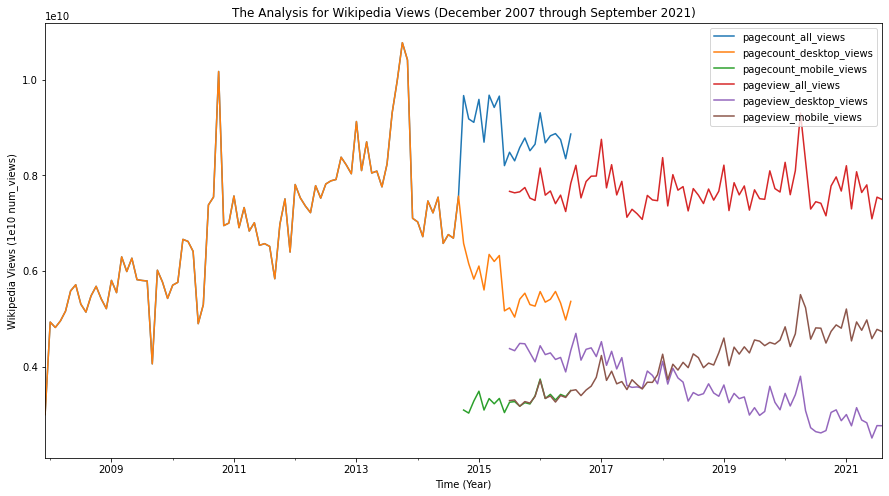

In [20]:
# Read in data from CSV file saved in Step 2
wiki_data = pd.read_csv('en-wikipedia_traffic_200712-202108.csv')

# Extract views data
pagecount_all_views = wiki_data['pagecount_all_views'].values
pagecount_desktop_views = wiki_data['pagecount_desktop_views'].values
pagecount_mobile_views = wiki_data['pagecount_mobile_views'].values
pageview_all_views = wiki_data['pageview_all_views'].values
pageview_desktop_views = wiki_data['pageview_desktop_views'].values
pageview_mobile_views = wiki_data['pageview_mobile_views'].values

# Created new dataframe that has timeseries information
wiki_timeseries = pd.DataFrame(np.vstack((pagecount_all_views, pagecount_desktop_views,
                                          pagecount_mobile_views, pageview_all_views, 
                                          pageview_desktop_views, pageview_mobile_views)).T,
                               index=pd.date_range(start='2007-12-01', end='2021-09-01', freq='M'), 
                               columns = ['pagecount_all_views', 'pagecount_desktop_views', 
                                          'pagecount_mobile_views', 'pageview_all_views', 
                                          'pageview_desktop_views', 'pageview_mobile_views'])

# Replace 0 with Nan so 0s is not shown on the plot
wiki_timeseries.replace(0, np.nan, inplace=True)

# Make the line plot
wiki_timeseries.plot(figsize=(15,8))
plt.title('The Analysis for Wikipedia Views (December 2007 through September 2021)')
plt.xlabel('Time (Year)')
plt.ylabel('Wikipedia Views (1e10 num_views)')